In [50]:
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
data = pd.read_csv('data_final.csv',sep=';',index_col=False)

In [9]:
data.head()

,Unnamed: 0,Policy_Effective_Date,Policy_Expiration_Date,Package_Indicator,System_New_Renew,Producer_Number,GWP,Distance_To_Initial_Policy,Initial_Policy_Key,Renewed,Outstanding_ALAE_Reserve_Amt,Outstanding_Loss_Reserve_Amt,Paid_ALAE_Amt,Paid_Loss_Amt,Claim_Feature_Count,Claim_Folder_Count,Claims_Made_Trigger,Occurrence_Trigger,Number_of_Classes,Number_of_Class_Groups,Number_of_Coverages,Number_of_PL2s,Product_Line2_Code,ProfitSharing_Indicator,CorporateAccount_Indicator,Policy_Length,Expiring_Quarter,Expiring_Month,State_Match,Commission_Percent,Acreage,ArmedServices_Pct,AssetsAvg,AverageHouseholdSize,CarsPerOwnedHouse_Pct,CarsPerRentedHouse_Pct,ClimateAvgTemp,ClimateAvgTempJan,ClimateAvgTempJuly,ClimateCoolingDays,ClimateHeatingDays,ClimateHighTemp,ClimateHighTempJan,ClimateHighTempJuly,ClimateIndexCO,ClimateIndexLead,ClimateIndexNO2,ClimateIndexOzone,ClimateIndexParticulates,ClimateLowTemp,ClimateLowTempJan,ClimateLowTempJuly,ClimateRainfall,ClimateSnowfall,DebtsAvg,Divorced_Pct,EducationBachelor_Pct,EducationCollege_Pct,EducationHigherDegree_Pct,EducationHighSchool_Pct,EducationNoDiploma_Pct,EducationNoGrade9_Pct,EducationSomeCollege_Pct,Employed_Pct,ExpenseAlcohol,ExpenseApparel,ExpenseContributions,ExpenseEducation,ExpenseEntertainment,ExpenseFoodHome,ExpenseFootOut,ExpenseGasOil,ExpenseGifts,ExpenseHealth,ExpenseHousehold,ExpenseHouseholdOps,ExpenseMisc,ExpenseMotorcycles,ExpenseNewVehicle,ExpenseOtherTransport,ExpensePersonalCare,ExpensePersonalInsurance,ExpensePublicTransport,ExpenseReading,ExpenseShelter,ExpenseTobacco,ExpenseTotNonRetail,ExpenseTotRetail,ExpenseUsedVehicle,ExpenseUtilities,ExpenseVehicleFinance,ExpenseVehicleInsurance,ExpenseVehicleMaintenance,FamilyHouseholds_Pct,FemaleHouseholds_Pct,FemaleKidsNoHusbandHouseholds_Pct,FemaleNoHusbandHouseholds_Pct,FinancialAssetsAvg,Foreclosure_Pct,HighCostHMDALoans_Pct,HomeEquityAvg,HomesCondo_Pct,HomesFamily_Pct,HomesForeclosed_Pct,HomesHighCostLoan_Pct,HomesMortgaged_Pct,HomesMultiFamily_Pct,HomesSales_Pct,HomesSalesAvg,HomesVacant90Days_Pct,Households15To24_Pct,Households25To34_Pct,Households35To44_Pct,Households45To54_Pct,Households55To59_Pct,Households60To64_Pct,Households65To74_Pct,Households75To84_Pct,Households85plus_Pct,HousesDelinquent_Pct,HousesFinancialAssets_Pct,HousesHighDebt_Pct,HousesMortgaged_Pct,HousesMortgageDebt_Pct,HousesNonFinancialAssets_Pct,HousesOtherDebt_Pct,HousesOwned_Pct,HousesOwnerOccupied_Pct,HousesRented_Pct,HousesVacant_Pct,HousesVacantForRent_Pct,HousesVacantForSale_Pct,HousesVacation_Pct,HousingUnitsVacant_Pct,IncomeAvgDisposable,IncomeAvgFamily,IncomeAvgHouse,IncomeMedDisposable,IncomeMedFamily,IncomeMedHouse,IncomePerCapita,InLaborForce_Pct,MaleHouseholds_Pct,MaleKidsNoWifeHouseholds_Pct,MaleNoWifeHouseholds_Pct,MarriedChildenHouseholds_Pct,MarriedCoupleHouseholds_Pct,MedianAge,MedianFemaleAge,MedianMaleAge,NetWorth,NeverMarried_Pct,NonFamilyHouseholds_Pct,NotInLaborForce_Pct,NowMarried_Pct,PersonsHouseholds_Pct,PopAge13to19_Pct,PopAge20to29_Pct,PopAge30to49_Pct,PopAge50to69_Pct,PopAge6to12_Pct,PopAge70andMore_Pct,PopCollegeDorms_Pct,PopGroupQuaters_Pct,PopInstitutionalized_Pct,PopJail_Pct,PopJuvenileJail_Pct,PopMilitaryQuarters_Pct,PopNonInstitution_Pct,PopNursingHome_Pct,PopOtherInstitution_Pct,PopOtherQuarters_Pct,PopOver18_Pct,Population,PopulationDensity,PopulationDensity16PlusArmedForces,PopulationDensity16PlusEmployed,PopulationDensity16PlusNotInLaborForce,PopulationDensity16PlusUnemployed,PopulationDensity25PlusBachelor,PopulationDensity25PlusCollege,PopulationDensity25PlusHigherDegree,PopulationDensity25PlusHighSchoolGraduate,PopulationDensity25PlusLessThan9thGrade,PopulationDensity25PlusNoDiploma,PopulationDensity25PlusSomeCollege,PopulationDensityAge13to19,PopulationDensityAge20to29,PopulationDensityAge30to49,PopulationDensityAge50to69,PopulationDensityAge6to12,PopulationDensityAge70andMore,PopulationDensityCollegeDormitories,PopulationDensityCorrectionalInstitutions,PopulationDensityGroupQuarters,PopulationDensityGro

In [11]:
data = data.drop(data.columns[0], axis=1)

In [15]:
data.drop(columns=['PopulationDensityMilitaryQuarters'], inplace=True)

In [12]:
data.head()

,Policy_Effective_Date,Policy_Expiration_Date,Package_Indicator,System_New_Renew,Producer_Number,GWP,Distance_To_Initial_Policy,Initial_Policy_Key,Renewed,Outstanding_ALAE_Reserve_Amt,Outstanding_Loss_Reserve_Amt,Paid_ALAE_Amt,Paid_Loss_Amt,Claim_Feature_Count,Claim_Folder_Count,Claims_Made_Trigger,Occurrence_Trigger,Number_of_Classes,Number_of_Class_Groups,Number_of_Coverages,Number_of_PL2s,Product_Line2_Code,ProfitSharing_Indicator,CorporateAccount_Indicator,Policy_Length,Expiring_Quarter,Expiring_Month,State_Match,Commission_Percent,Acreage,ArmedServices_Pct,AssetsAvg,AverageHouseholdSize,CarsPerOwnedHouse_Pct,CarsPerRentedHouse_Pct,ClimateAvgTemp,ClimateAvgTempJan,ClimateAvgTempJuly,ClimateCoolingDays,ClimateHeatingDays,ClimateHighTemp,ClimateHighTempJan,ClimateHighTempJuly,ClimateIndexCO,ClimateIndexLead,ClimateIndexNO2,ClimateIndexOzone,ClimateIndexParticulates,ClimateLowTemp,ClimateLowTempJan,ClimateLowTempJuly,ClimateRainfall,ClimateSnowfall,DebtsAvg,Divorced_Pct,EducationBachelor_Pct,EducationCollege_Pct,EducationHigherDegree_Pct,EducationHighSchool_Pct,EducationNoDiploma_Pct,EducationNoGrade9_Pct,EducationSomeCollege_Pct,Employed_Pct,ExpenseAlcohol,ExpenseApparel,ExpenseContributions,ExpenseEducation,ExpenseEntertainment,ExpenseFoodHome,ExpenseFootOut,ExpenseGasOil,ExpenseGifts,ExpenseHealth,ExpenseHousehold,ExpenseHouseholdOps,ExpenseMisc,ExpenseMotorcycles,ExpenseNewVehicle,ExpenseOtherTransport,ExpensePersonalCare,ExpensePersonalInsurance,ExpensePublicTransport,ExpenseReading,ExpenseShelter,ExpenseTobacco,ExpenseTotNonRetail,ExpenseTotRetail,ExpenseUsedVehicle,ExpenseUtilities,ExpenseVehicleFinance,ExpenseVehicleInsurance,ExpenseVehicleMaintenance,FamilyHouseholds_Pct,FemaleHouseholds_Pct,FemaleKidsNoHusbandHouseholds_Pct,FemaleNoHusbandHouseholds_Pct,FinancialAssetsAvg,Foreclosure_Pct,HighCostHMDALoans_Pct,HomeEquityAvg,HomesCondo_Pct,HomesFamily_Pct,HomesForeclosed_Pct,HomesHighCostLoan_Pct,HomesMortgaged_Pct,HomesMultiFamily_Pct,HomesSales_Pct,HomesSalesAvg,HomesVacant90Days_Pct,Households15To24_Pct,Households25To34_Pct,Households35To44_Pct,Households45To54_Pct,Households55To59_Pct,Households60To64_Pct,Households65To74_Pct,Households75To84_Pct,Households85plus_Pct,HousesDelinquent_Pct,HousesFinancialAssets_Pct,HousesHighDebt_Pct,HousesMortgaged_Pct,HousesMortgageDebt_Pct,HousesNonFinancialAssets_Pct,HousesOtherDebt_Pct,HousesOwned_Pct,HousesOwnerOccupied_Pct,HousesRented_Pct,HousesVacant_Pct,HousesVacantForRent_Pct,HousesVacantForSale_Pct,HousesVacation_Pct,HousingUnitsVacant_Pct,IncomeAvgDisposable,IncomeAvgFamily,IncomeAvgHouse,IncomeMedDisposable,IncomeMedFamily,IncomeMedHouse,IncomePerCapita,InLaborForce_Pct,MaleHouseholds_Pct,MaleKidsNoWifeHouseholds_Pct,MaleNoWifeHouseholds_Pct,MarriedChildenHouseholds_Pct,MarriedCoupleHouseholds_Pct,MedianAge,MedianFemaleAge,MedianMaleAge,NetWorth,NeverMarried_Pct,NonFamilyHouseholds_Pct,NotInLaborForce_Pct,NowMarried_Pct,PersonsHouseholds_Pct,PopAge13to19_Pct,PopAge20to29_Pct,PopAge30to49_Pct,PopAge50to69_Pct,PopAge6to12_Pct,PopAge70andMore_Pct,PopCollegeDorms_Pct,PopGroupQuaters_Pct,PopInstitutionalized_Pct,PopJail_Pct,PopJuvenileJail_Pct,PopMilitaryQuarters_Pct,PopNonInstitution_Pct,PopNursingHome_Pct,PopOtherInstitution_Pct,PopOtherQuarters_Pct,PopOver18_Pct,Population,PopulationDensity,PopulationDensity16PlusArmedForces,PopulationDensity16PlusEmployed,PopulationDensity16PlusNotInLaborForce,PopulationDensity16PlusUnemployed,PopulationDensity25PlusBachelor,PopulationDensity25PlusCollege,PopulationDensity25PlusHigherDegree,PopulationDensity25PlusHighSchoolGraduate,PopulationDensity25PlusLessThan9thGrade,PopulationDensity25PlusNoDiploma,PopulationDensity25PlusSomeCollege,PopulationDensityAge13to19,PopulationDensityAge20to29,PopulationDensityAge30to49,PopulationDensityAge50to69,PopulationDensityAge6to12,PopulationDensityAge70andMore,PopulationDensityCollegeDormitories,PopulationDensityCorrectionalInstitutions,PopulationDensityGroupQuarters,PopulationDensityGroupQuartersI

In [16]:
data.shape

(23380, 269)

In [17]:
print(data.isnull().sum())

Policy_Effective_Date                                  0
Policy_Expiration_Date                                 0
Package_Indicator                                      0
System_New_Renew                                       0
Producer_Number                                        0
GWP                                                    0
Distance_To_Initial_Policy                             0
Initial_Policy_Key                                     0
Renewed                                                0
Outstanding_ALAE_Reserve_Amt                           0
Outstanding_Loss_Reserve_Amt                           0
Paid_ALAE_Amt                                          0
Paid_Loss_Amt                                          0
Claim_Feature_Count                                    0
Claim_Folder_Count                                     0
Claims_Made_Trigger                                    0
Occurrence_Trigger                                     0
Number_of_Classes              

In [18]:
# add random walk
# Probability to move up or down
prob = [0.05, 0.95]
# statically defining the starting position
start = 2
positions = [start]
# creating the random points
rr = np.random.random(9999)
downp = rr < prob[0]
upp = rr > prob[1]
for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 4
    positions.append(positions[-1] - down + up)

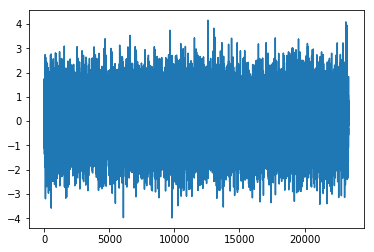

In [22]:
mean = 0
std = 1 
num_samples = data.shape[0]
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

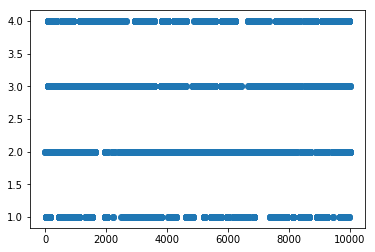

In [20]:
plt.scatter(range(len(positions)),positions)

In [23]:
data['whitenoise']=samples

In [40]:
data.drop(columns=['Policy_Effective_Date','Policy_Expiration_Date'],inplace=True)

In [41]:
data.head()

,Package_Indicator,System_New_Renew,Producer_Number,GWP,Distance_To_Initial_Policy,Initial_Policy_Key,Renewed,Outstanding_ALAE_Reserve_Amt,Outstanding_Loss_Reserve_Amt,Paid_ALAE_Amt,Paid_Loss_Amt,Claim_Feature_Count,Claim_Folder_Count,Claims_Made_Trigger,Occurrence_Trigger,Number_of_Classes,Number_of_Class_Groups,Number_of_Coverages,Number_of_PL2s,Product_Line2_Code,ProfitSharing_Indicator,CorporateAccount_Indicator,Policy_Length,Expiring_Quarter,Expiring_Month,State_Match,Commission_Percent,Acreage,ArmedServices_Pct,AssetsAvg,AverageHouseholdSize,CarsPerOwnedHouse_Pct,CarsPerRentedHouse_Pct,ClimateAvgTemp,ClimateAvgTempJan,ClimateAvgTempJuly,ClimateCoolingDays,ClimateHeatingDays,ClimateHighTemp,ClimateHighTempJan,ClimateHighTempJuly,ClimateIndexCO,ClimateIndexLead,ClimateIndexNO2,ClimateIndexOzone,ClimateIndexParticulates,ClimateLowTemp,ClimateLowTempJan,ClimateLowTempJuly,ClimateRainfall,ClimateSnowfall,DebtsAvg,Divorced_Pct,EducationBachelor_Pct,EducationCollege_Pct,EducationHigherDegree_Pct,EducationHighSchool_Pct,EducationNoDiploma_Pct,EducationNoGrade9_Pct,EducationSomeCollege_Pct,Employed_Pct,ExpenseAlcohol,ExpenseApparel,ExpenseContributions,ExpenseEducation,ExpenseEntertainment,ExpenseFoodHome,ExpenseFootOut,ExpenseGasOil,ExpenseGifts,ExpenseHealth,ExpenseHousehold,ExpenseHouseholdOps,ExpenseMisc,ExpenseMotorcycles,ExpenseNewVehicle,ExpenseOtherTransport,ExpensePersonalCare,ExpensePersonalInsurance,ExpensePublicTransport,ExpenseReading,ExpenseShelter,ExpenseTobacco,ExpenseTotNonRetail,ExpenseTotRetail,ExpenseUsedVehicle,ExpenseUtilities,ExpenseVehicleFinance,ExpenseVehicleInsurance,ExpenseVehicleMaintenance,FamilyHouseholds_Pct,FemaleHouseholds_Pct,FemaleKidsNoHusbandHouseholds_Pct,FemaleNoHusbandHouseholds_Pct,FinancialAssetsAvg,Foreclosure_Pct,HighCostHMDALoans_Pct,HomeEquityAvg,HomesCondo_Pct,HomesFamily_Pct,HomesForeclosed_Pct,HomesHighCostLoan_Pct,HomesMortgaged_Pct,HomesMultiFamily_Pct,HomesSales_Pct,HomesSalesAvg,HomesVacant90Days_Pct,Households15To24_Pct,Households25To34_Pct,Households35To44_Pct,Households45To54_Pct,Households55To59_Pct,Households60To64_Pct,Households65To74_Pct,Households75To84_Pct,Households85plus_Pct,HousesDelinquent_Pct,HousesFinancialAssets_Pct,HousesHighDebt_Pct,HousesMortgaged_Pct,HousesMortgageDebt_Pct,HousesNonFinancialAssets_Pct,HousesOtherDebt_Pct,HousesOwned_Pct,HousesOwnerOccupied_Pct,HousesRented_Pct,HousesVacant_Pct,HousesVacantForRent_Pct,HousesVacantForSale_Pct,HousesVacation_Pct,HousingUnitsVacant_Pct,IncomeAvgDisposable,IncomeAvgFamily,IncomeAvgHouse,IncomeMedDisposable,IncomeMedFamily,IncomeMedHouse,IncomePerCapita,InLaborForce_Pct,MaleHouseholds_Pct,MaleKidsNoWifeHouseholds_Pct,MaleNoWifeHouseholds_Pct,MarriedChildenHouseholds_Pct,MarriedCoupleHouseholds_Pct,MedianAge,MedianFemaleAge,MedianMaleAge,NetWorth,NeverMarried_Pct,NonFamilyHouseholds_Pct,NotInLaborForce_Pct,NowMarried_Pct,PersonsHouseholds_Pct,PopAge13to19_Pct,PopAge20to29_Pct,PopAge30to49_Pct,PopAge50to69_Pct,PopAge6to12_Pct,PopAge70andMore_Pct,PopCollegeDorms_Pct,PopGroupQuaters_Pct,PopInstitutionalized_Pct,PopJail_Pct,PopJuvenileJail_Pct,PopMilitaryQuarters_Pct,PopNonInstitution_Pct,PopNursingHome_Pct,PopOtherInstitution_Pct,PopOtherQuarters_Pct,PopOver18_Pct,Population,PopulationDensity,PopulationDensity16PlusArmedForces,PopulationDensity16PlusEmployed,PopulationDensity16PlusNotInLaborForce,PopulationDensity16PlusUnemployed,PopulationDensity25PlusBachelor,PopulationDensity25PlusCollege,PopulationDensity25PlusHigherDegree,PopulationDensity25PlusHighSchoolGraduate,PopulationDensity25PlusLessThan9thGrade,PopulationDensity25PlusNoDiploma,PopulationDensity25PlusSomeCollege,PopulationDensityAge13to19,PopulationDensityAge20to29,PopulationDensityAge30to49,PopulationDensityAge50to69,PopulationDensityAge6to12,PopulationDensityAge70andMore,PopulationDensityCollegeDormitories,PopulationDensityCorrectionalInstitutions,PopulationDensityGroupQuarters,PopulationDensityGroupQuartersInstitionalized,PopulationDensityGroupQuarters

In [42]:
data.shape

(23380, 268)

# XGBOOST

In [38]:
import xgboost as xgb
from xgboost import plot_importance

In [43]:
demosize=10000
demo=data.sample(demosize)

In [44]:
y=demo.Renewed
X=demo.drop(columns=['Renewed'])

In [45]:
X.shape

(10000, 267)

In [46]:
y.head()

18829    1
11753    0
20818    1
11377    1
21175    1
Name: Renewed, dtype: int64

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [61]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', seed = 123)
model1=xg_cl.fit(X_train,y_train)

In [63]:
dtrain = xgb.DMatrix(X_train, label=y_train)
#watchlist = [(dtrain, 'train')]
param = {'max_depth': 4, 'learning_rate': 0.03}
num_round = 200
bst = xgb.train(param, dtrain, num_round)

/home/yx4pt/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [103]:
preds=model1.predict(X_test)

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [106]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
accuracy

0.736

## Get Feature importance

In [82]:
s=bst.get_score(importance_type='gain')

In [97]:
score_df=pd.DataFrame(list(s.items()), columns=['Feature', 'Score']).sort_values(by='Score',ascending=False)
score_df = score_df.reset_index(drop=True)

In [99]:
score_df[(score_df.Feature=='whitenoise')].index

Int64Index([183], dtype='int64')

In [101]:
score_df.iloc[:184,:]

,Feature,Score
0,Commission_Percent,7.951502
1,Policy_Length,4.371983
2,Product_Line2_Code,4.135459
3,ClimateLowTemp,3.320774
4,Claim_Folder_Count,3.170695
5,ExpenseUtilities,3.115449
6,RiskHurricaneMaxSev,3.112819
7,IncomeMedHouse,2.980300
8,Package_Indicator,2.898193
9,Expiring_Month,2.880939
